import lib

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import data

In [ ]:
data = pd.read_csv('/content/SriLanka_Weather_Dataset_updated.csv')

In [ ]:
data.head(5)


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,State of sky on the whole unchanged,30.0,22.7,26.1,34.4,25.2,29.2,2010-01-01T00:52,2010-01-01T12:35,...,0.0,11.7,27.4,20,4.58,7.0,79.899994,16.0,Sri Lanka,Colombo
1,2010-01-02,"Drizzle, not freezing, continuous ( slight at ...",29.9,23.5,26.2,33.8,26.2,29.8,2010-01-02T00:52,2010-01-02T12:36,...,1.0,13.0,27.0,24,3.84,7.0,79.899994,16.0,Sri Lanka,Colombo
2,2010-01-03,"Drizzle, not freezing, continuous ( slight at ...",29.5,23.2,26.0,34.3,26.3,29.9,2010-01-03T00:53,2010-01-03T12:36,...,3.0,12.3,27.4,16,3.65,7.0,79.899994,16.0,Sri Lanka,Colombo
3,2010-01-04,State of sky on the whole unchanged,28.9,21.9,25.3,31.6,23.4,27.8,2010-01-04T00:53,2010-01-04T12:37,...,0.0,17.0,34.6,356,3.79,7.0,79.899994,16.0,Sri Lanka,Colombo
4,2010-01-05,Clouds dissolving or becoming less developed,28.1,21.3,24.5,30.1,23.1,26.1,2010-01-05T00:53,2010-01-05T12:37,...,0.0,18.7,37.1,355,4.97,7.0,79.899994,16.0,Sri Lanka,Colombo


In [ ]:


import folium

# Extract latitude and longitude columns
# latitude = data['latitude']
# longitude = data['longitude']

# # Create a map object centered at the mean latitude and longitude
# map = folium.Map(location=[latitude.mean(), longitude.mean()], zoom_start=7)

# # Add markers for each data point
# for lat, lng in zip(latitude, longitude):
#     folium.Marker(location=[lat, lng]).add_to(map)

# # Display the map
# map


In [ ]:
data.isnull().sum()


time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

In [ ]:
print(data.dtypes)

time                           object
weathercode                    object
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                     float64
country                        object
city                           object
dtype: object


In [ ]:
# Encode categorical target labels
label_encoder = LabelEncoder()

# Encode 'city' column
data['city'] = label_encoder.fit_transform(data['city'])

# Encode 'country' column
data['country'] = label_encoder.fit_transform(data['country'])

# Encode weathercode column
data['weathercode'] = label_encoder.fit_transform(data['weathercode'])


In [ ]:
#check all data type
print(data.dtypes)

time                           object
weathercode                     int64
temperature_2m_max            float64
temperature_2m_min            float64
temperature_2m_mean           float64
apparent_temperature_max      float64
apparent_temperature_min      float64
apparent_temperature_mean     float64
sunrise                        object
sunset                         object
shortwave_radiation_sum       float64
precipitation_sum             float64
rain_sum                      float64
snowfall_sum                  float64
precipitation_hours           float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant      int64
et0_fao_evapotranspiration    float64
latitude                      float64
longitude                     float64
elevation                     float64
country                         int64
city                            int64
dtype: object


i need find VarianceThreshold  then



In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Separate features and target variable
# drop dates columns for find VarianceThreshold
X = data.drop(["weathercode",'time', 'sunrise','sunset'], axis=1)

# Initialize VarianceThreshold with the desired threshold
threshold = 0.05  # You can adjust this threshold
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(X)

# Get the indices of the features to keep
features_to_keep = selector.get_support(indices=True)

# Filter the original dataframe to keep only the selected features
selected_features = X.iloc[:, features_to_keep]

# Print the selected features
print("Selected Features:")
print(selected_features.head())

Selected Features:
   temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0                30.0                22.7                 26.1   
1                29.9                23.5                 26.2   
2                29.5                23.2                 26.0   
3                28.9                21.9                 25.3   
4                28.1                21.3                 24.5   

   apparent_temperature_max  apparent_temperature_min  \
0                      34.4                      25.2   
1                      33.8                      26.2   
2                      34.3                      26.3   
3                      31.6                      23.4   
4                      30.1                      23.1   

   apparent_temperature_mean  shortwave_radiation_sum  precipitation_sum  \
0                       29.2                    20.92                0.0   
1                       29.8                    17.71                0.1   
2            

In [ ]:
print("Selected Features:")
for col in selected_features.columns.tolist():
    print(col)

Selected Features:
temperature_2m_max
temperature_2m_min
temperature_2m_mean
apparent_temperature_max
apparent_temperature_min
apparent_temperature_mean
shortwave_radiation_sum
precipitation_sum
rain_sum
precipitation_hours
windspeed_10m_max
windgusts_10m_max
winddirection_10m_dominant
et0_fao_evapotranspiration
latitude
longitude
elevation
city


In [ ]:
dropped_columns = [col for col in X.columns if col not in X.columns[features_to_keep]]

# Print the list of dropped columns
print("Dropped Columns:")
print(dropped_columns)

Dropped Columns:
['snowfall_sum', 'country']


now  i need connect date colome to selectd  feacher

In [ ]:
selected_features = pd.concat([data[["weathercode","time", "sunrise", "sunset"]], selected_features], axis=1)


In [ ]:
# Convert date column to datetime data type
selected_features[['time', 'sunrise','sunset']] = selected_features[['time', 'sunrise','sunset']].apply(pd.to_datetime)


In [ ]:
#check all data type
print(selected_features.dtypes)

weathercode                            int64
time                          datetime64[ns]
sunrise                       datetime64[ns]
sunset                        datetime64[ns]
temperature_2m_max                   float64
temperature_2m_min                   float64
temperature_2m_mean                  float64
apparent_temperature_max             float64
apparent_temperature_min             float64
apparent_temperature_mean            float64
shortwave_radiation_sum              float64
precipitation_sum                    float64
rain_sum                             float64
precipitation_hours                  float64
windspeed_10m_max                    float64
windgusts_10m_max                    float64
winddirection_10m_dominant             int64
et0_fao_evapotranspiration           float64
latitude                             float64
longitude                            float64
elevation                            float64
city                                   int64
dtype: obj

In [ ]:
y = data["weathercode"]
y.head()

0    9
1    5
2    5
3    9
4    1
Name: weathercode, dtype: int64

In [ ]:
# Compute the correlation matrix
correlation_matrix = selected_features.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            weathercode          time       sunrise  \
weathercode                    1.000000 -1.759565e-03 -1.760247e-03   
time                          -0.001760  1.000000e+00  1.000000e+00   
sunrise                       -0.001760  1.000000e+00  1.000000e+00   
sunset                        -0.001760  1.000000e+00  1.000000e+00   
temperature_2m_max            -0.140091  5.100921e-02  5.100950e-02   
temperature_2m_min             0.023041  2.324519e-02  2.324350e-02   
temperature_2m_mean           -0.098132  4.339257e-02  4.339190e-02   
apparent_temperature_max      -0.016200  4.575257e-02  4.575237e-02   
apparent_temperature_min       0.083190  3.068860e-02  3.068684e-02   
apparent_temperature_mean      0.019729  4.588871e-02  4.588772e-02   
shortwave_radiation_sum       -0.283015  1.592210e-02  1.592276e-02   
precipitation_sum              0.286774 -1.534770e-02 -1.534855e-02   
rain_sum                       0.286774 -1.534770e-02 -1.

In [ ]:
# for data vishlization lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


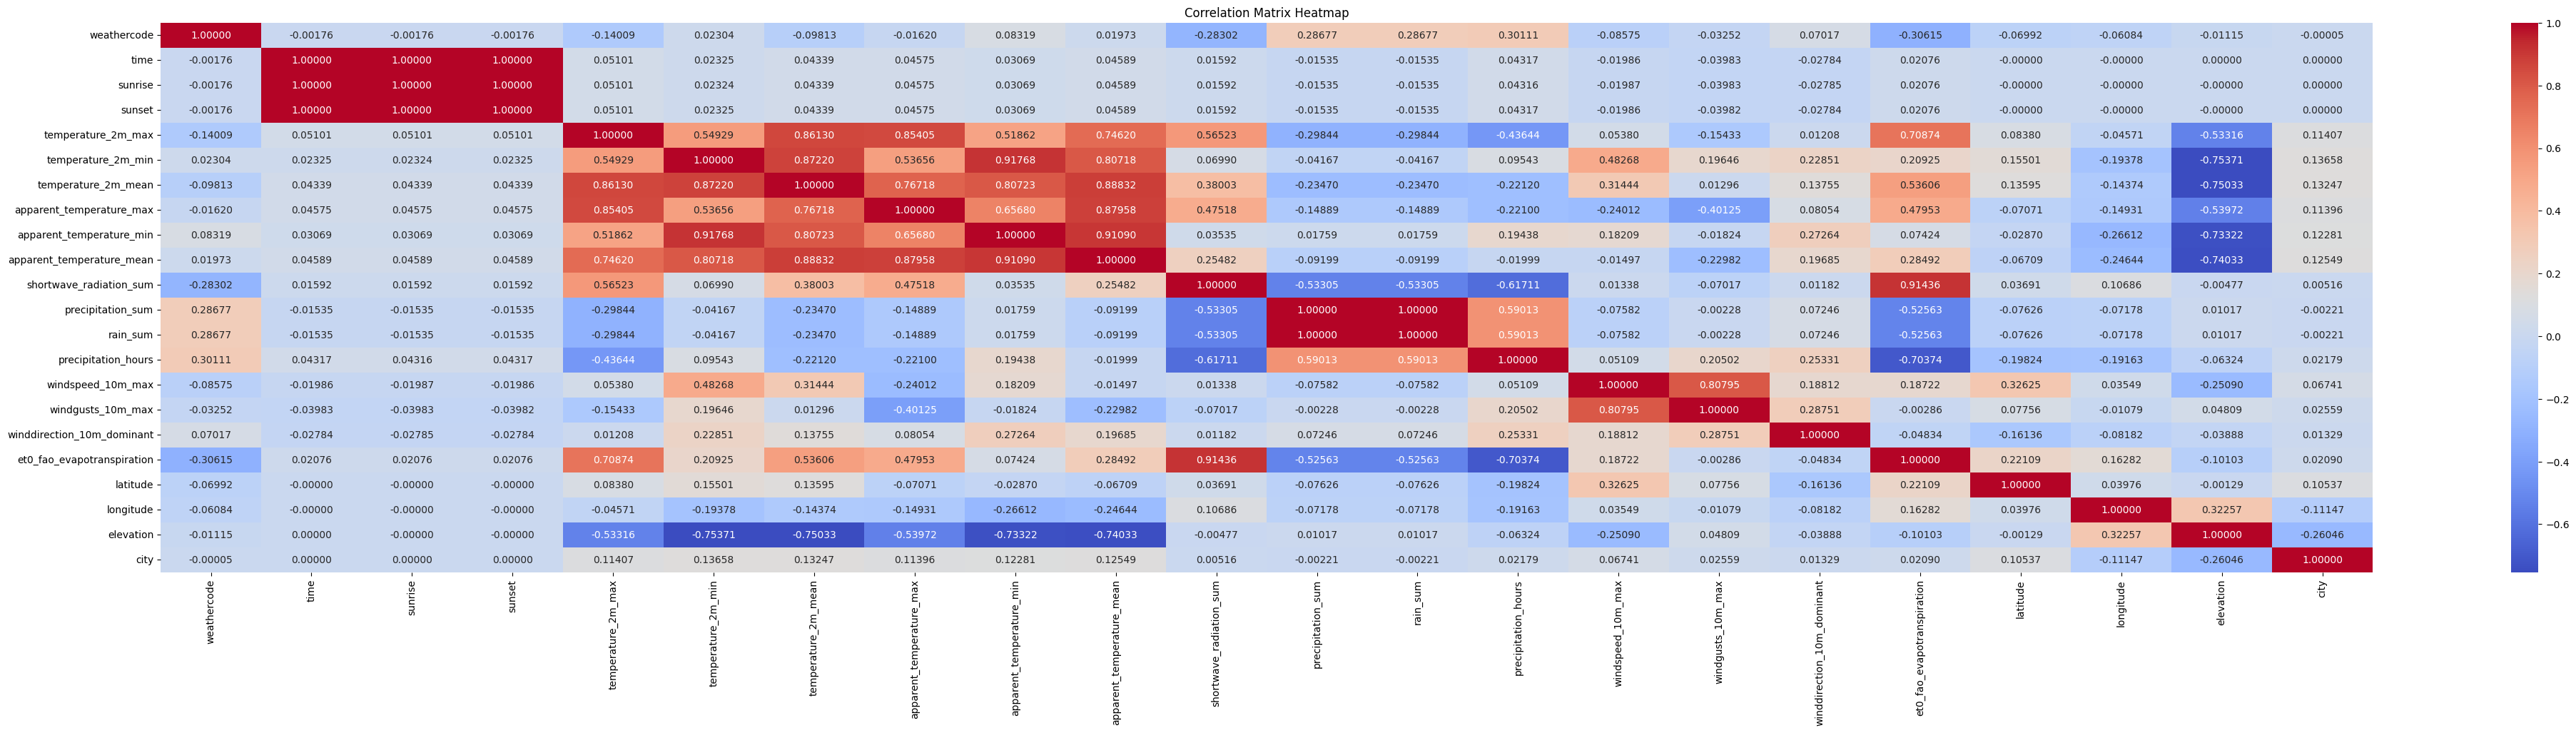

In [ ]:
plt.figure(figsize=(50, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".5f", annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Set correlation threshold
correlation_threshold = 0.85

# Identify columns with high correlations
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Print highly correlated columns

# Convert the set to a list
highly_correlated_columns_list = list(highly_correlated_columns)

# Print highly correlated columns
print("Highly Correlated Columns:")
for col in highly_correlated_columns_list:
    print(col)

print("-------------------------------------------------------------------------------------") ;

# Set correlation threshold
correlation_threshold = 0.85

# Identify pairs of columns with high correlations
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((col1, col2, correlation_matrix.iloc[i, j]))

# Print highly correlated pairs of columns
print("Highly Correlated Pairs of Columns:")
for col1, col2, correlation in highly_correlated_pairs:
    print(f"{col1} - {col2}: {correlation}")

Highly Correlated Columns:
temperature_2m_mean
apparent_temperature_min
apparent_temperature_mean
sunset
et0_fao_evapotranspiration
sunrise
rain_sum
apparent_temperature_max
-------------------------------------------------------------------------------------
Highly Correlated Pairs of Columns:
sunrise - time: 0.9999999999837433
sunset - time: 0.9999999999794541
sunset - sunrise: 0.9999999999644755
temperature_2m_mean - temperature_2m_max: 0.8612961850367096
temperature_2m_mean - temperature_2m_min: 0.8721989382525159
apparent_temperature_max - temperature_2m_max: 0.8540494280888054
apparent_temperature_min - temperature_2m_min: 0.9176753708475327
apparent_temperature_mean - temperature_2m_mean: 0.8883244707752249
apparent_temperature_mean - apparent_temperature_max: 0.8795822292759032
apparent_temperature_mean - apparent_temperature_min: 0.9109025417117115
rain_sum - precipitation_sum: 1.0
et0_fao_evapotranspiration - shortwave_radiation_sum: 0.9143617943871347


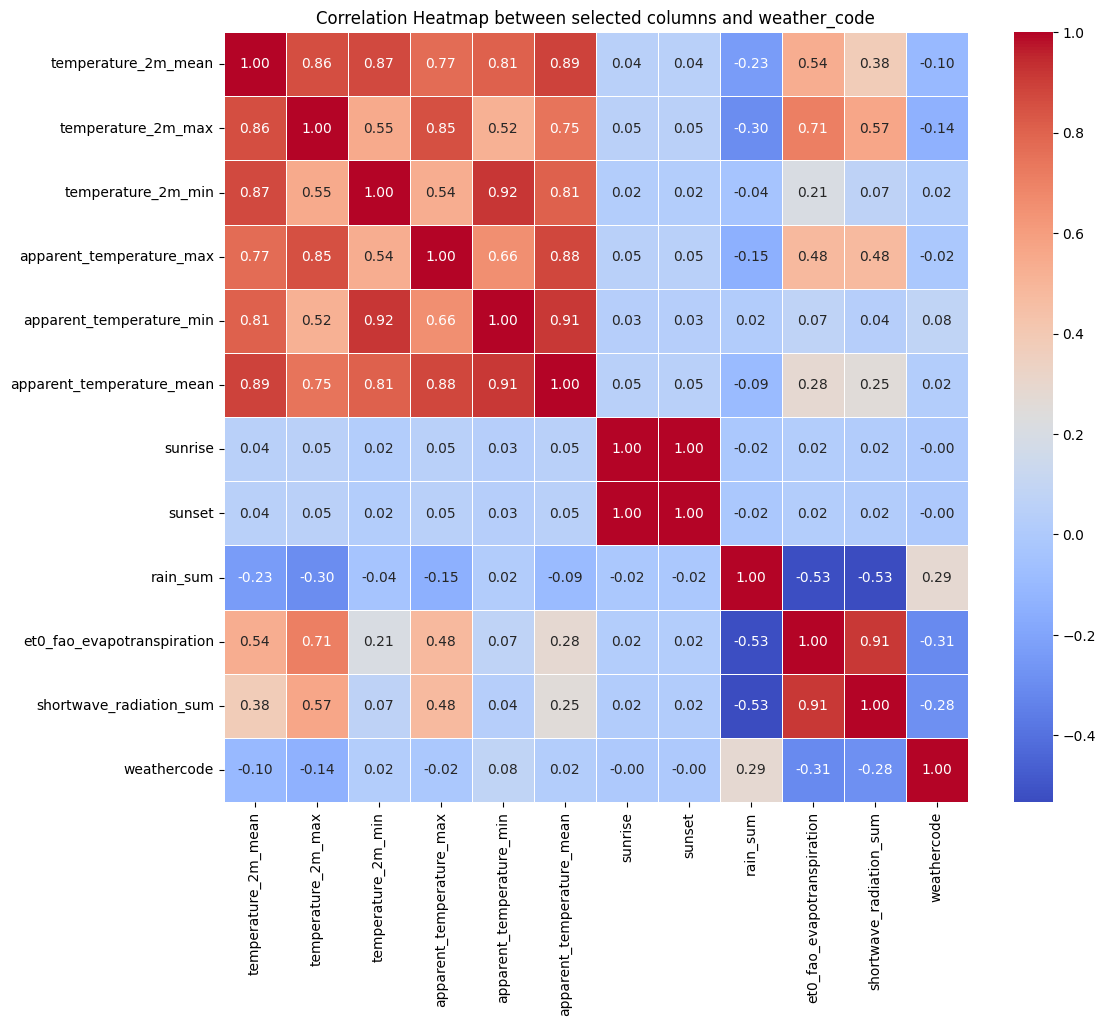

In [ ]:
# Define the columns of interest
columns_of_interest = ['temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min',
                       'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean',
                       'sunrise', 'sunset', 'rain_sum', 'et0_fao_evapotranspiration', 'shortwave_radiation_sum',
                       'weathercode']

# Subset the correlation matrix to include only the columns of interest
corr_subset = correlation_matrix.loc[columns_of_interest, columns_of_interest]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap between selected columns and weather_code")
plt.show()

In [ ]:
# Select the specified columns
need_drop = ["temperature_2m_mean", "sunrise", "sunset", "apparent_temperature_min",
                "apparent_temperature_mean", "shortwave_radiation_sum", "rain_sum",
                "apparent_temperature_max"]

print(need_drop)

['temperature_2m_mean', 'sunrise', 'sunset', 'apparent_temperature_min', 'apparent_temperature_mean', 'shortwave_radiation_sum', 'rain_sum', 'apparent_temperature_max']


aftere identify unnessary colome


In [ ]:
df = pd.read_csv('/content/SriLanka_Weather_Dataset_updated.csv')

In [ ]:
need_drop = ["temperature_2m_mean", "sunrise", "sunset", "apparent_temperature_min",
                "apparent_temperature_mean", "shortwave_radiation_sum", "rain_sum",
                "apparent_temperature_max","snowfall_sum","country"]

df.drop(columns=need_drop, inplace=True)
